# หนังสือ Data Science วิเคราะห์การตลาด ด้วย Python
---
### บทที่ 3 การสำรวจและแสดงข้อมูลด้วยภาพ
##### * (ผู้อ่านสามารถเปรียบเทียบ หมายเลขรูป กับ หนังสือ ได้)  *

In [6]:
import pandas as pd
df = pd.DataFrame({
'Customer ID':pd.Series([101,102,103,104,105,106,107,108,109]),
'Country':pd.Series(['Australia','Canada','Spain','Spain','India',
'Austria', 'China','Japan','Switzerland'])
})

In [7]:
df['Country'].unique() (รูปที่ 3.4)

array(['Australia', 'Canada', 'Spain', 'India', 'Austria', 'China',
       'Japan', 'Switzerland'], dtype=object)

In [8]:
df['Country'].value_counts() (รูปที่ 3.5)

Country
Spain          2
Australia      1
Canada         1
India          1
Austria        1
China          1
Japan          1
Switzerland    1
Name: count, dtype: int64

In [3]:
# ตัวอย่าง 3.1 (รูปที่ 3.6)
import pandas as pd
sales = pd.read_csv('data/sales2.csv')
sales.head()
sales.columns
sales.info()

sales['Year'].unique()
sales['Product line'].unique()
sales['Product type'].unique()
sales['Product'].unique()
sales['Order method type'].unique()
sales['Retailer country'].unique()

sales.describe()

sales['Year'].value_counts()
sales['Product line'].value_counts()
sales['Product type'].value_counts()
sales['Order method type'].value_counts()
sales['Retailer country'].value_counts()

sales.groupby('Retailer country')[['Revenue','Planned revenue',
                                   'Product cost','Quantity',
                                   'Gross profit']].sum()

sales.dropna().groupby('Retailer country')[['Revenue','Planned revenue',
                                            'Product cost','Quantity',
                                            'Unit cost','Unit price',
                                            'Gross profit',
                                            'Unit sale price']].min()

sales.groupby('Year')[['Revenue','Planned revenue','Product cost',
                       'Quantity','Unit cost','Unit price',
                       'Gross profit','Unit sale price']].sum()

sales.groupby('Product line')[['Revenue','Planned revenue',
                               'Product cost','Quantity','Unit cost',
                               'Unit price','Gross profit',
                               'Unit sale price']].sum()

sales.groupby('Order method type')[['Revenue','Planned revenue',
                                    'Product cost','Quantity',
                                    'Gross profit']].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17823 entries, 0 to 17822
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               17823 non-null  int64  
 1   Product line       17823 non-null  object 
 2   Product type       17823 non-null  object 
 3   Product            17823 non-null  object 
 4   Order method type  17823 non-null  object 
 5   Retailer country   17823 non-null  object 
 6   Revenue            6045 non-null   float64
 7   Planned revenue    6045 non-null   float64
 8   Product cost       6045 non-null   float64
 9   Quantity           5860 non-null   float64
 10  Unit cost          6045 non-null   float64
 11  Unit price         6045 non-null   float64
 12  Gross profit       6045 non-null   float64
 13  Unit sale price    6045 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.9+ MB


,Revenue,Planned revenue,Product cost,Quantity,Gross profit
Order method type,,,,,
E-mail,3.238293e+07,3.301196e+07,1.768881e+07,1503654.0,1.352462e+07
Fax,1.376507e+07,1.399805e+07,7.399451e+06,653190.0,5.993243e+06
Mail,9.749679e+06,9.942812e+06,5.211545e+06,483151.0,4.175907e+06
Sales visit,6.946909e+07,7.141927e+07,3.870416e+07,3084491.0,2.890578e+07
Special,6.642340e+06,6.618693e+06,3.550795e+06,324760.0,2.824776e+06
Telephone,7.056328e+07,7.230265e+07,3.889483e+07,3200421.0,2.907046e+07
Web,4.251736e+08,4.328256e+08,2.332322e+08,18241196.0,1.776287e+08


In [4]:
# ตัวอย่าง 3.2 (รูปที่ 3.19)
import pandas as pd
sales = pd.read_csv('data/sales2.csv')
# ปรับแต่งเพื่อสร้างข้อมูลเชิงลึก
sales.loc[sales['Retailer country']=='United States',
          ['Revenue','Quantity','Gross profit']].head()

sales.iloc[[0,1], [0,1,2]]

sales = sales.rename({'Revenue':'Earning'}, axis=1)
sales.head(2)

,Year,Product line,Product type,Product,Order method type,Retailer country,Earning,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.7,6586.16,1733.2,619.0,2.8,10.64,4086.5,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Reshaping data (รูปที่ 3.23)
import pandas as pd
cta = pd.read_csv('data/CTA_comparison.csv')
cta

,time,CTA Variant,views,sales
0,12:30:00,A,500,100
1,13:30:00,B,800,50
2,14:30:00,C,300,14
3,15:30:00,A,700,94
4,16:30:00,C,300,20
5,17:30:00,B,800,45
6,18:30:00,B,800,56
7,19:30:00,C,250,18
8,20:30:00,A,500,125


In [6]:
cta.set_index('CTA Variant') #(รูปที่ 3.24)

,time,views,sales
CTA Variant,,,
A,12:30:00,500,100
B,13:30:00,800,50
C,14:30:00,300,14
A,15:30:00,700,94
C,16:30:00,300,20
B,17:30:00,800,45
B,18:30:00,800,56
C,19:30:00,250,18
A,20:30:00,500,125


In [7]:
#(รูปที่ 3.25)
cta.set_index(['CTA Variant', 'views']) 

time  sales
CTA Variant views                 
A           500    12:30:00    100
B           800    13:30:00     50
C           300    14:30:00     14
A           700    15:30:00     94
C           300    16:30:00     20
B           800    17:30:00     45
            800    18:30:00     56
C           250    19:30:00     18
A           500    20:30:00    125

In [8]:
cta.reset_index() #(รูปที่ 3.26)

,index,time,CTA Variant,views,sales
0,0,12:30:00,A,500,100
1,1,13:30:00,B,800,50
2,2,14:30:00,C,300,14
3,3,15:30:00,A,700,94
4,4,16:30:00,C,300,20
5,5,17:30:00,B,800,45
6,6,18:30:00,B,800,56
7,7,19:30:00,C,250,18
8,8,20:30:00,A,500,125


In [9]:
# (รูปที่ 3.27)
grouped = cta.groupby(['CTA Variant', 'views']).count()
grouped

time  sales
CTA Variant views             
A           500       2      2
            700       1      1
B           800       3      3
C           250       1      1
            300       2      2

In [10]:
# (รูปที่ 3.28)
stacked = cta.stack()
stacked 

0  time           12:30:00
   CTA Variant           A
   views               500
   sales               100
1  time           13:30:00
   CTA Variant           B
   views               800
   sales                50
2  time           14:30:00
   CTA Variant           C
   views               300
   sales                14
3  time           15:30:00
   CTA Variant           A
   views               700
   sales                94
4  time           16:30:00
   CTA Variant           C
   views               300
   sales                20
5  time           17:30:00
   CTA Variant           B
   views               800
   sales                45
6  time           18:30:00
   CTA Variant           B
   views               800
   sales                56
7  time           19:30:00
   CTA Variant           C
   views               250
   sales                18
8  time           20:30:00
   CTA Variant           A
   views               500
   sales               125
dtype: object

In [11]:
# (รูปที่ 3.29)
unstacked = stacked.unstack().unstack()
unstacked

time         0    12:30:00
             1    13:30:00
             2    14:30:00
             3    15:30:00
             4    16:30:00
             5    17:30:00
             6    18:30:00
             7    19:30:00
             8    20:30:00
CTA Variant  0           A
             1           B
             2           C
             3           A
             4           C
             5           B
             6           B
             7           C
             8           A
views        0         500
             1         800
             2         300
             3         700
             4         300
             5         800
             6         800
             7         250
             8         500
sales        0         100
             1          50
             2          14
             3          94
             4          20
             5          45
             6          56
             7          18
             8         125
dtype: object

In [12]:
# ตัวอย่าง 3.3 (รูปที่ 3.30)
import pandas as pd
data = pd.read_csv('data/conversion_rates.csv')
data.head(3)

converted_df = data.groupby('group').sum()
converted_df

viewed_df = data.groupby('group').count()\
                .rename({'converted':'viewed'}, \
                        axis = 'columns')
viewed_df

stats = converted_df.merge(viewed_df, on = 'group')

stats['conversion_ratio'] = stats['converted']/stats['viewed']

df = stats.stack()

df['A']['conversion_ratio']

stats.unstack().unstack()

group,A,B
converted,90.000000,21.000000
viewed,1030.000000,970.000000
conversion_ratio,0.087379,0.021649


In [20]:
# pivot() (รูปที่ 3.39)
pivot1 = data.pivot(columns='group',values='converted')
print(pivot1)

group    A    B
0      NaN  0.0
1      NaN  0.0
2      0.0  NaN
3      NaN  0.0
4      0.0  NaN
...    ...  ...
1995   NaN  0.0
1996   NaN  0.0
1997   0.0  NaN
1998   0.0  NaN
1999   1.0  NaN

[2000 rows x 2 columns]


In [21]:
# pivot_table() (รูปที่ 3.40)
pivot2 = data.pivot_table(index='group',columns='converted',
                          aggfunc=len)
print(pivot2)

converted    0   1
group             
A          940  90
B          949  21


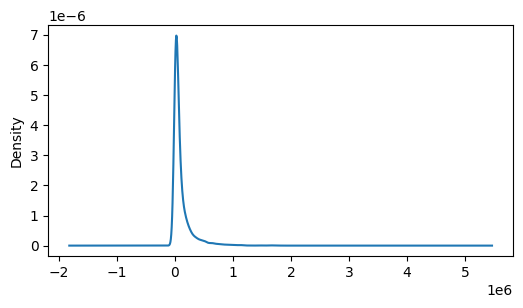

In [24]:
# visualizing data 
## density plot (รูปที่ 3.41)
import pandas as pd
df = pd.read_csv('data/sales2.csv')

import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
df['Revenue'].plot.density()
plt.show();

In [25]:
## bar plot 
    # - จัดกลุ่ม (รูปที่ 3.42)
df_groupOrderMethodType = df.groupby('Order method type').count()
df_groupOrderMethodType

,Year,Product line,Product type,Product,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Order method type,,,,,,,,,,,,,
E-mail,2547,2547,2547,2547,2547,549,549,549,533,549,549,549,549
Fax,2547,2547,2547,2547,2547,447,447,447,432,447,447,447,447
Mail,2547,2547,2547,2547,2547,365,365,365,356,365,365,365,365
Sales visit,2541,2541,2541,2541,2541,1200,1200,1200,1152,1200,1200,1200,1200
Special,2547,2547,2547,2547,2547,217,217,217,210,217,217,217,217
Telephone,2547,2547,2547,2547,2547,974,974,974,944,974,974,974,974
Web,2547,2547,2547,2547,2547,2293,2293,2293,2233,2293,2293,2293,2293


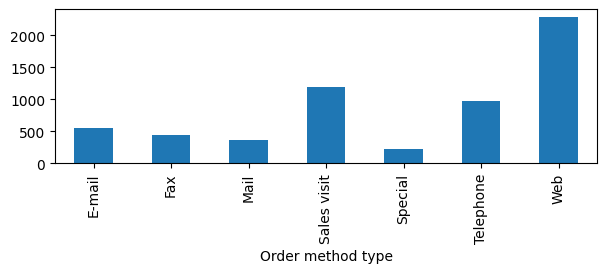

In [37]:
    # plot (รูปที่ 3.43)
plt.figure(figsize=(7,2)) 
df_groupOrderMethodType['Revenue'].plot(kind = 'bar');

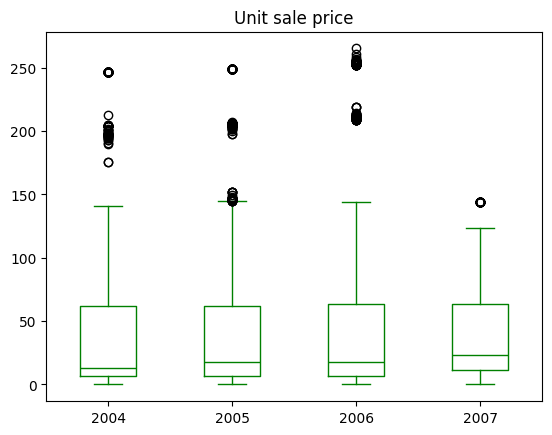

In [46]:
## box plot (รูปที่ 3.44)
df.plot.box(column = 'Unit sale price', by = 'Year', color='g');

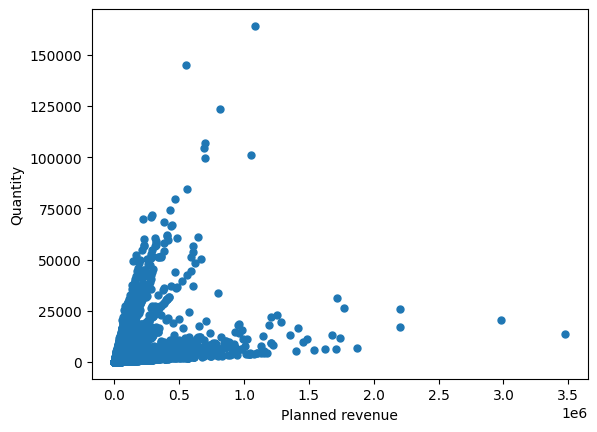

In [55]:
## Scatter plot (รูปที่ 3.45)
df.plot.scatter(x='Planned revenue', y='Quantity', s=25);

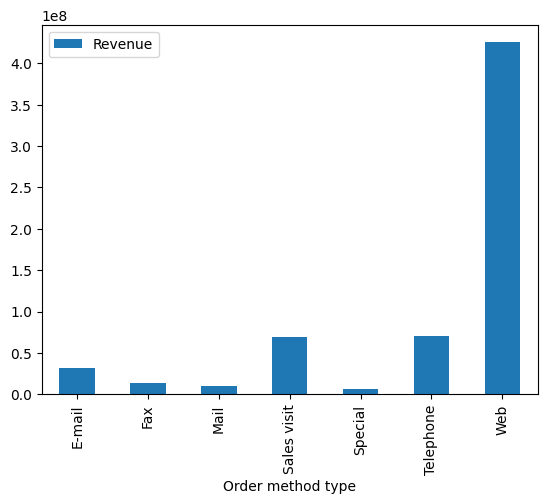

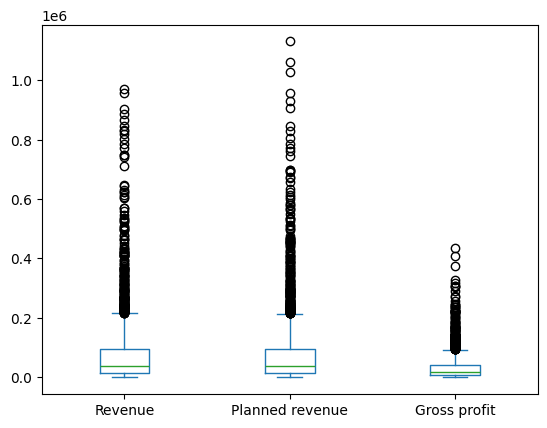

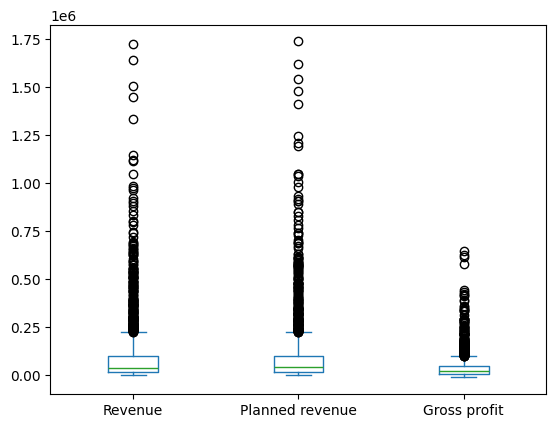

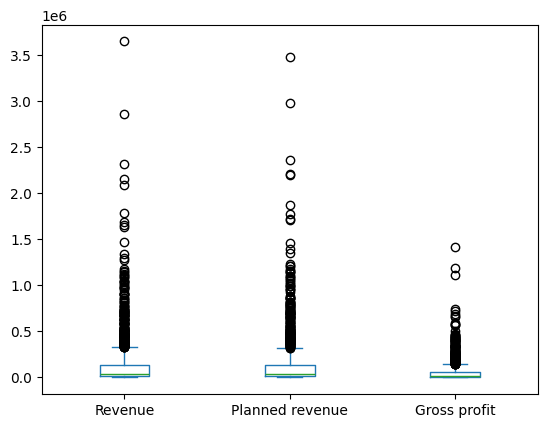

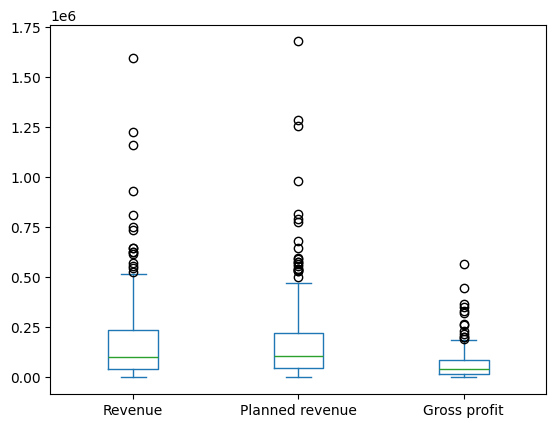

In [29]:
# ตัวอย่าง 3.4 (รูปที่ 3.46)
import pandas as pd

sales = pd.read_csv('data/sales2.csv')
sales.groupby('Order method type').sum().plot(kind='bar',y='Revenue');

sales.groupby('Year')[['Revenue', 'Planned revenue',
                      'Gross profit']].plot(kind='box');

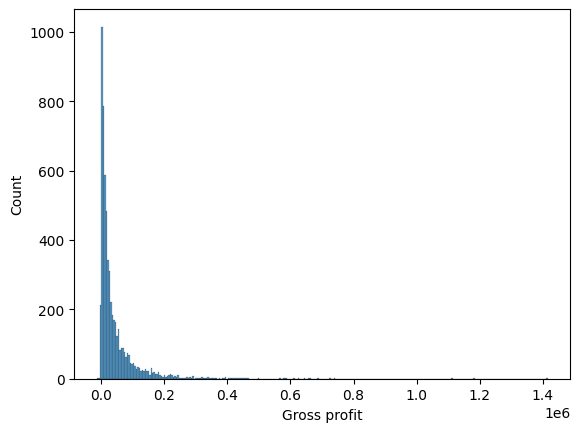

In [32]:
# (รูปที่ 3.49)
import seaborn as sns
import pandas as pd

df = pd.read_csv('data/sales2.csv')
sns.histplot(df['Gross profit'].dropna());

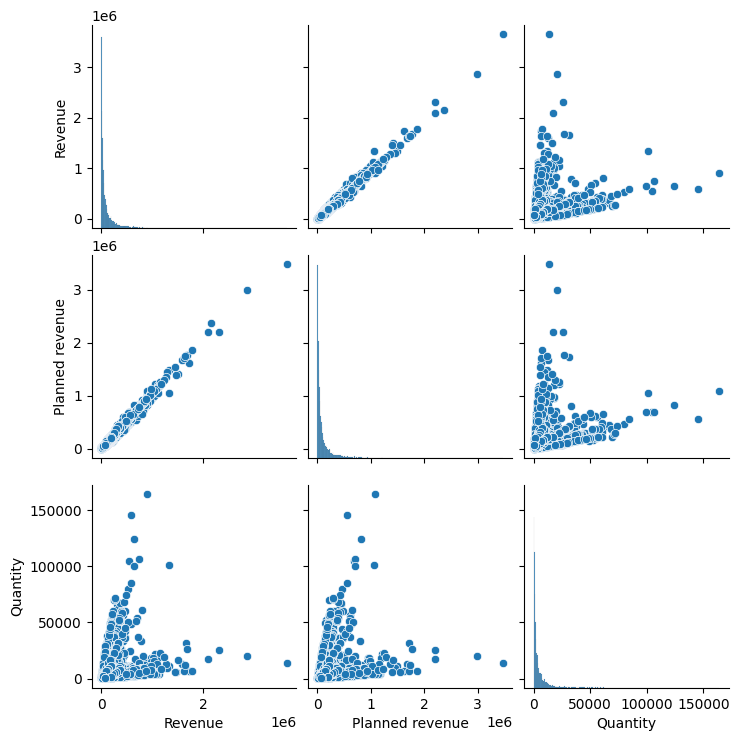

In [33]:
# (รูปที่ 3.50)
df2 = df[['Revenue','Planned revenue','Quantity']]
sns.pairplot(df2);

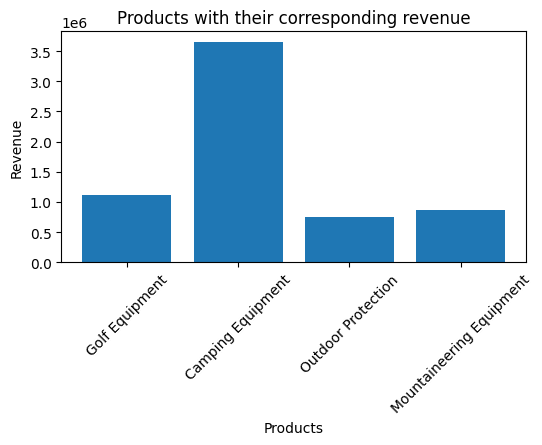

In [35]:
# ตัวอย่าง 3.5 (รูปที่ 3.51)
import pandas as pd
df = pd.read_csv('data/sales2.csv')

import matplotlib.pyplot as plt
plt.bar(df['Product line'],df['Revenue'])
plt.title('Products with their corresponding revenue')
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.show();

In [ ]:
# กิจกรรมที่ 3.1 (รูปที่ 3.53)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ads = pd.read_csv('data/Advertising.csv', index_col='Date')
ads.head()
ads.info()
ads.describe()

ads['Products'].unique()
ads['Products'].value_counts()

ads.groupby('Products')[[ 'Web', 'Newspaper', 'Radio', 'TV']].sum()
ads.groupby('Products').sum()

ads.groupby('Products').sum().plot(kind='bar',
                                  y='TV', color='grey');
ads.groupby('Products').sum().plot(kind='bar',
                                  y='Web', color='blue');

sns.pairplot(ads, hue='Products');